# Exploring data augmentation methods

### Import libaries

In [1]:
# Common libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import torch

# Seed
SEED = 11
torch.manual_seed(SEED)

### Labels

In [2]:
labels = {
    0: "N",
    1: "S",
    2: "V",
    3: "F",
    4: "Q"
}

### Import dataset

Column names are not provided in csv file, hence we will set header parameter to None below to obtain the the correct train and test datasets

In [3]:
train_data = pd.read_csv("Heartbeat_Dataset/mitbih_train.csv", header=None)
test_data = pd.read_csv("Heartbeat_Dataset/mitbih_test.csv", header=None)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split train dataset into train and validation sets before performing data augmentation

In [4]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X_train = train_data.iloc[:, :-1].values  # Exclude label
y_train = train_data.iloc[:, -1].values   # Labels

# Stratifying the split so both train and validation sets have same class distribution
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED, stratify=y_train)

### View data distribution

In [5]:
# Check number of samples in datasets
print(f"Number of samples in train data: {X_train.shape[0]}")

# Check distribution of classes in test and train sets
classes, counts = np.unique(y_train, return_counts=True)
class_labels = np.vectorize(labels.get)(classes) # convert to their string labels

# print the counts
print(np.asarray((class_labels, counts)).T)

Number of samples in train data: 70043
[['N' '57977']
 ['S' '1778']
 ['V' '4630']
 ['F' '513']
 ['Q' '5145']]


C:\Users\randa\AppData\Local\Temp\ipykernel_53476\832063077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=class_labels, y=counts, palette=colors)
C:\Users\randa\AppData\Local\Temp\ipykernel_53476\832063077.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sb.barplot(x=class_labels, y=counts, palette=colors)


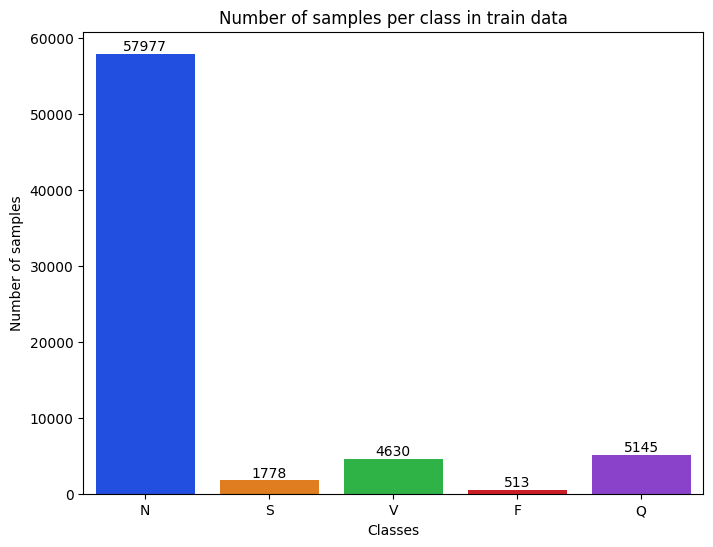

In [6]:
colors = sb.color_palette('bright')

plt.figure(figsize=(8, 6))
ax = sb.barplot(x=class_labels, y=counts, palette=colors)

# Annotate each bar with the count
for i, p in enumerate(ax.patches):
    ax.annotate(f'{counts[i]}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10)

plt.title('Number of samples per class in train data')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.show()

Text(0.5, 1.0, 'Percentage of each class in train data')

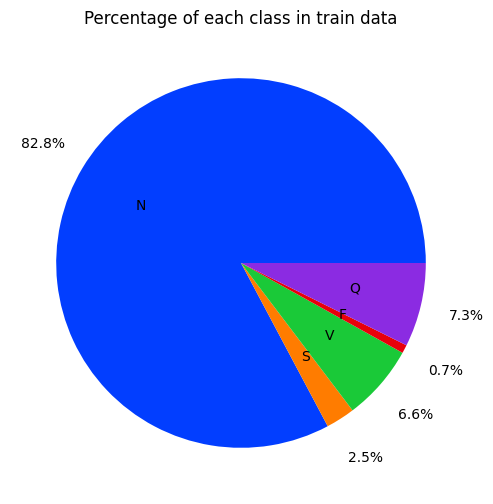

In [7]:
plt.figure(figsize=(8, 6))
plt.pie(x=counts, labels=class_labels, colors=colors,
        autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)
plt.title('Percentage of each class in train data')

As can be seen, the distribution of the data is very imbalanced with class N having significantly more data points compared to the other classes, this could result in training a biased model towards the majority class, N in this case. The models trained from the imbalanced data may not generalise well to new, unseen data especially for the minority classes.

## Synthetic Minority Over-Sampling Technique (SMOTE)

### Resample data using SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(289885, 187)
(289885,)


[['N' '57977']
 ['S' '57977']
 ['V' '57977']
 ['F' '57977']
 ['Q' '57977']]


Text(0.5, 1.0, 'Percentage of each class in resampled train data')

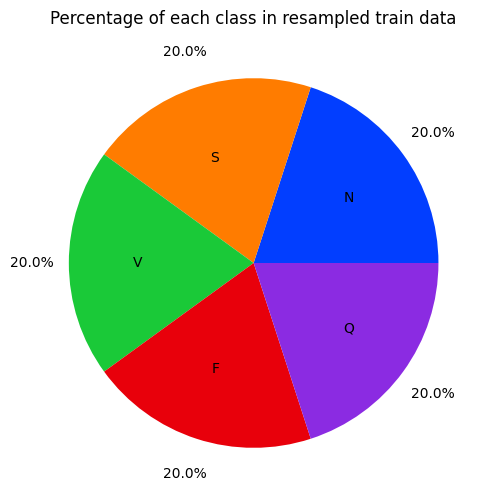

In [11]:
classes, counts = np.unique(y_train_resampled, return_counts=True)
class_labels = np.vectorize(labels.get)(classes) # convert to their string labels

# print the counts
print(np.asarray((class_labels, counts)).T)

plt.figure(figsize=(8, 6))
plt.pie(x=counts, labels=class_labels, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2, labeldistance=.6)
plt.title('Percentage of each class in resampled train data')

In [12]:
y_train_resampled_reshape = y_train_resampled.reshape(-1, 1)

# Combine X_train_resampled and y_train_resampled
train_data = np.column_stack((X_train_resampled, y_train_resampled_reshape))
print(train_data.shape)
train_data = pd.DataFrame(train_data)
train_data.to_csv("augmented_data/train_data.csv", index=False)

(289885, 188)


By using SMOTE, we sampled the minority classes (S, V, Q and F) and generated more data for them in order to match the number of samples in the majority class N, to get a balanced dataset where all classes have the same number of samples.

# Transformation all data to the same level

In [12]:
C0 = np.argwhere(y_train_resampled == 0).flatten()
C1 = np.argwhere(y_train_resampled == 1).flatten()
C2 = np.argwhere(y_train_resampled == 2).flatten()
C3 = np.argwhere(y_train_resampled == 3).flatten()
C4 = np.argwhere(y_train_resampled == 4).flatten()

In [13]:
print(C1.shape)
print(C2.shape)
print(C3.shape)
print(C4.shape)

(57977,)
(57977,)
(57977,)
(57977,)


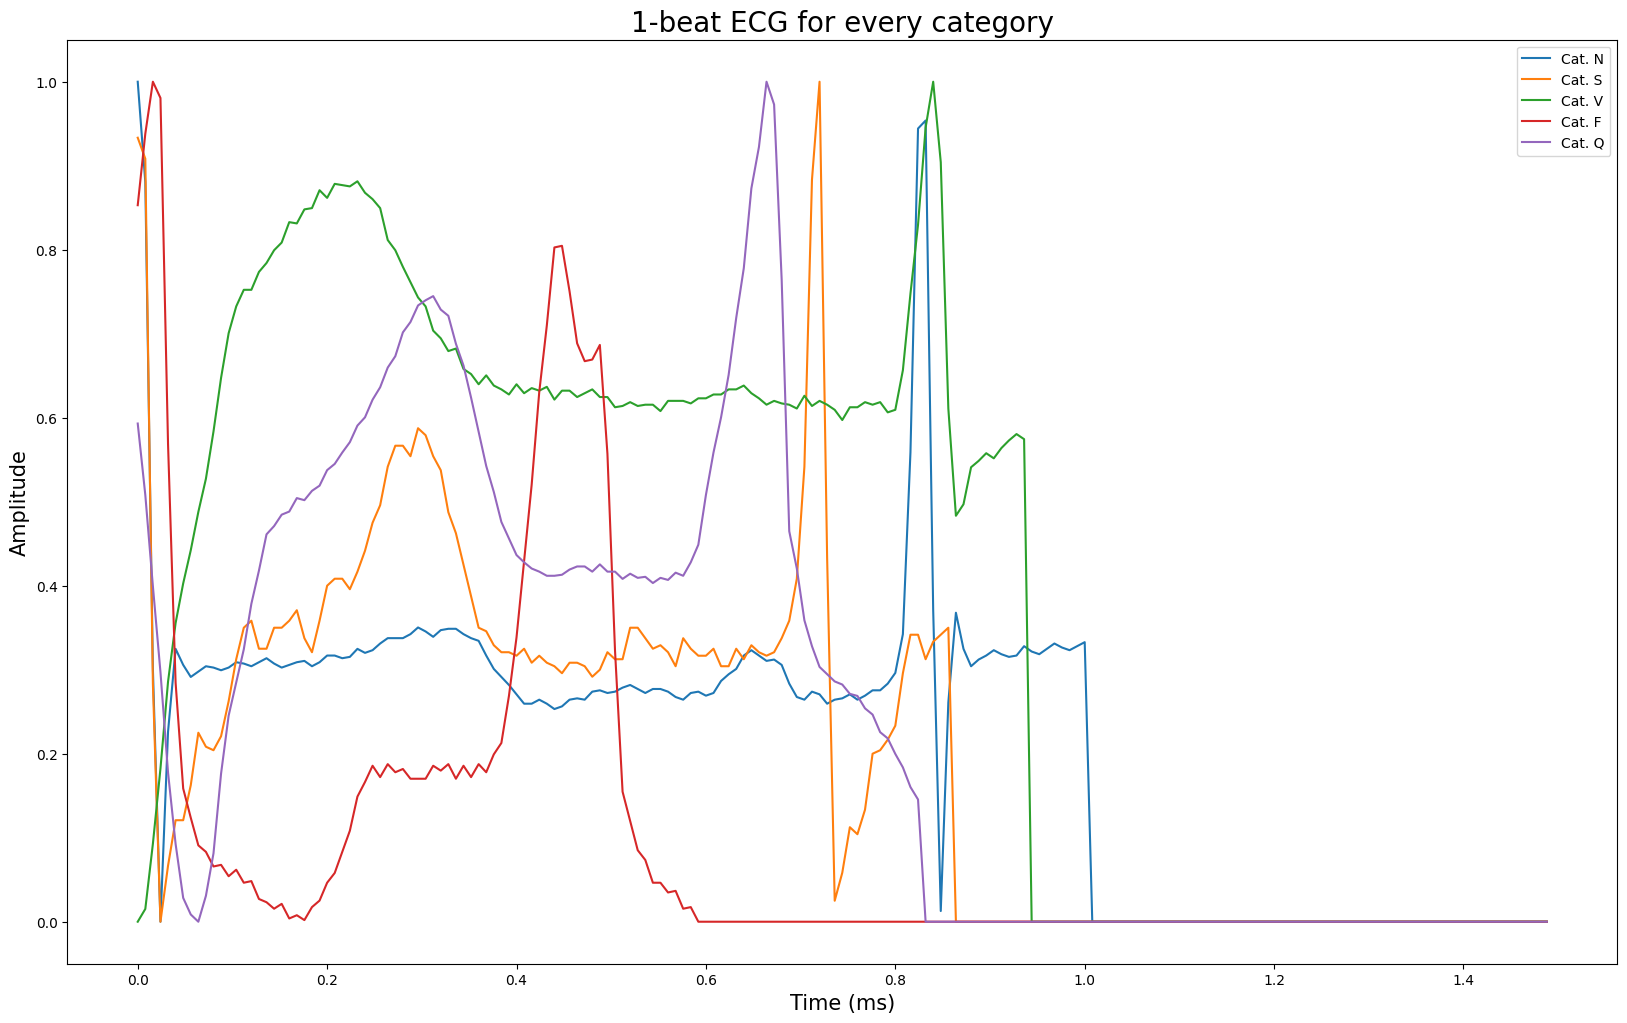

In [23]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X_train_resampled[C0, :][0], label="Cat. N")
plt.plot(x, X_train_resampled[C1, :][0], label="Cat. S")
plt.plot(x, X_train_resampled[C2, :][0], label="Cat. V")
plt.plot(x, X_train_resampled[C3, :][0], label="Cat. F")
plt.plot(x, X_train_resampled[C4, :][0], label="Cat. Q")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [15]:
from scipy.signal import resample
import random
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def augment_data(data):
    augmented_data = []
    for x in data:
        augmented_data.append(x)          # Original data
        augmented_data.append(stretch(x)) # Augmented with stretch
        augmented_data.append(amplify(x)) # Augmented with amplify
    return np.array(augmented_data)

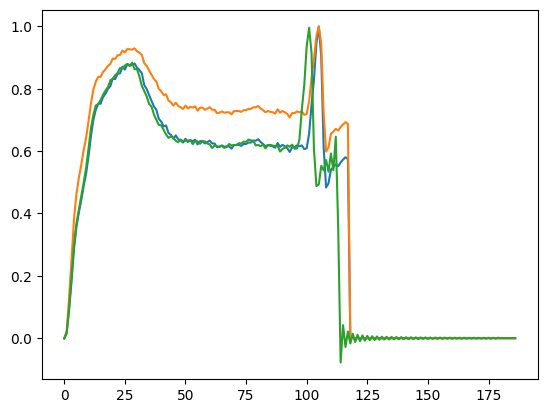

In [16]:
plt.plot(X_train_resampled[0, :])
plt.plot(amplify(X_train_resampled[0, :]))
plt.plot(stretch(X_train_resampled[0, :]))
plt.show()

In [25]:
augmented_data = augment_data(X_train_resampled)
extended_y_train = np.repeat(y_train_resampled, 3)

In [27]:
print("Original data shape:", X_train_resampled.shape)
print("Augmented data shape:", augmented_data.shape)
print("labels shape: ", extended_y_train.shape)

Original data shape: (289885, 187)
Augmented data shape: (869655, 187)
labels shape:  (869655,)


In [28]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)


(289885, 187)
(289885,)


In [29]:
unique_classes, counts = np.unique(y_train_resampled, return_counts=True)

# Display the result
for class_label, count in zip(unique_classes, counts):
    print(f"Class {class_label}: {count} samples")

Class 0.0: 57977 samples
Class 1.0: 57977 samples
Class 2.0: 57977 samples
Class 3.0: 57977 samples
Class 4.0: 57977 samples


In [30]:
unique_classes, counts = np.unique(extended_y_train, return_counts=True)

# Display the result
for class_label, count in zip(unique_classes, counts):
    print(f"Class {class_label}: {count} samples")

Class 0.0: 173931 samples
Class 1.0: 173931 samples
Class 2.0: 173931 samples
Class 3.0: 173931 samples
Class 4.0: 173931 samples
